In [2]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import string
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon.columns = ['review', 'sentiment']

In [4]:
amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


I chose features that can classify positive and negative Amazon review sentiment across product categories, by applying Naive Bayes method, we can found Which words are often used in the comments to satirize.

In [5]:
positives = ['good', 'great', 'happy', 'amazing', 'love', 'loved', 'nice', 'best','comfortable', 'easy', 'excellent', 'satisfied', 'works','worked', 'fabulous', 'fantastic', 'impressed', 'perfectly',]
negatives = ['bad', 'beware', 'hate', 'hated', 'crap', 'crappy', 'difficult', 'disappointed', 'disappointing', 'horrible', 'junk', 'not', 'problem', 'return', 'sucks', 'useless', 'waste', 'worst']
for positive in positives:
    amazon[str(positive)] = amazon.review.str.contains(str(positive),case=False)
for negative in negatives:
    amazon[str(negative)] = amazon.review.str.contains(str(negative),case=False)
amazon['sentiment'] = (amazon['sentiment'] == 1)

In [6]:
amazon.head()

,review,sentiment,good,great,happy,amazing,love,loved,nice,best,...,disappointing,horrible,junk,not,problem,return,sucks,useless,waste,worst
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,The mic is great.,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


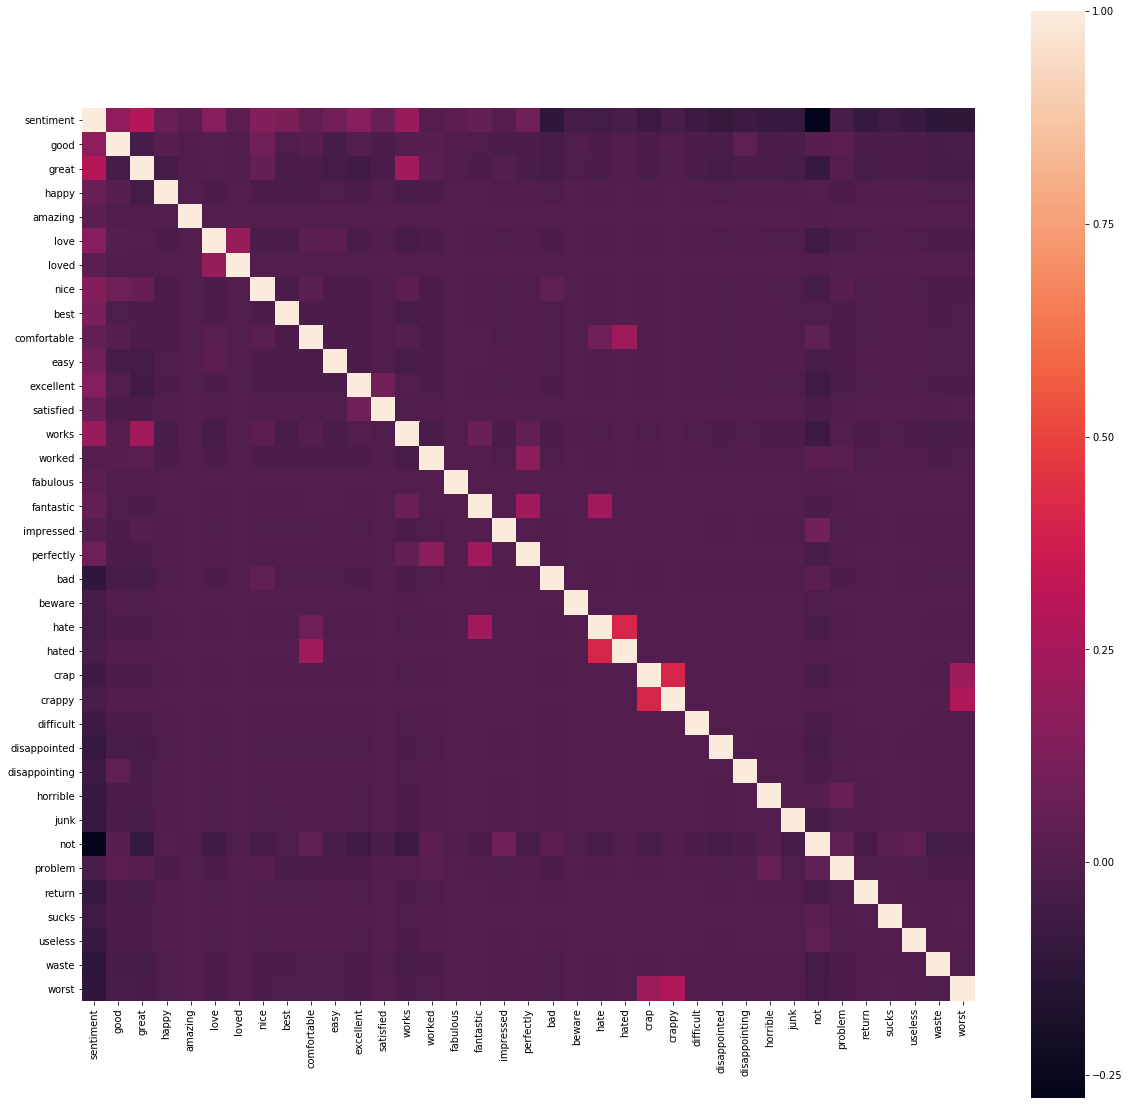

In [7]:
plt.figure(figsize=[20,20])
corr = sns.heatmap(amazon.corr(),square=True)

We can see that there are no significant correlations between positive words and negative words.

In [14]:
data = amazon.loc[:,'amazing':'worst']
target = amazon['sentiment']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 301


# Holdout Groups

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=20)
bnb.fit(X_train,y_train)
y_pred_class = bnb.predict(X_test)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.72
Testing on Sample: 0.699


# Cross-Validation

In [21]:
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.7 , 0.69, 0.7 , 0.81, 0.61, 0.68, 0.64, 0.7 , 0.71])